# Homework: Analysing Stock Market Data

Here we will use numpy and matplotlib to analyze and visualize some time series data, in the form of daily quotes for a single stock.

By the way, please feel free to choose any stock you like. If you're interested in this subject it may serve you well to know you can simply look up the stock of interest on, say, Yahoo finance: https://finance.yahoo.com/quote/AAPL, and click "Historical Data." That's how I got the data.

## Imports

I never mentioned this explicitly, but it's good practice to group all your imports at the beginning of the notebook or .py file rather than scattering them around and importing them just before they're used.

Although, it's quite forgivable to do this while you're developing code in a notebook. Just clean it up when you're done.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

Pandas is indispensable when working with files.

When you display a pandas dataframe in a notebook it gives you this nice interactive view!
This is also helpful because it lets you know what the columns mean, which is something you don't get with numpy alone.

In [3]:
apple_stock_data_pd = pd.read_csv('AAPL.csv')
apple_stock_data_pd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-16,38.270000,38.970001,38.250000,38.735001,37.178268,122278800
1,2019-01-17,38.549999,39.415001,38.314999,38.965000,37.399029,119284800
2,2019-01-18,39.375000,39.470001,38.994999,39.205002,37.629383,135004000
3,2019-01-22,39.102501,39.182499,38.154999,38.325001,36.784748,121576000
4,2019-01-23,38.537498,38.785000,37.924999,38.480000,36.933517,92522400
...,...,...,...,...,...,...,...
1252,2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59144500
1253,2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
1254,2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900
1255,2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400


On Yahoo finance (whence I got this data) it included the following little astrisk letting me know what 'Adj Close' means:

\*Close price adjusted for splits. \**Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

Given this, and my admittly paltry knowledge of the finer points of finace, it seems that we should use this adjusted close for most things.

We're supposed to be getting practive with numpy and we haven't covered Pandas yet, so we'll convert the data to a numpy array:

In [4]:
apple_stock_data = apple_stock_data_pd.to_numpy()
print(apple_stock_data.shape)

(1257, 7)


I never wrote out **"Alex's 10 virtues of numpy programming"** but if I did **"Always know the shape of your arrays"** would probably be #1!

As we saw, these seven columns represent ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']

By the way, this is quite common, and cool people sometimes shorten _Open, High, Low, and Close_ to _OHLC_. I want to be cool, so I'll call it that sometimes.

## Visualizing the graph

**Task**: Make a line plot showing the Open, High, Low, and Close of the last year. Make one plot which shows those lines overlaid, with a nice legend!

First we have to index the array to get a view of the desired columns. Make sure you understand how to do this.

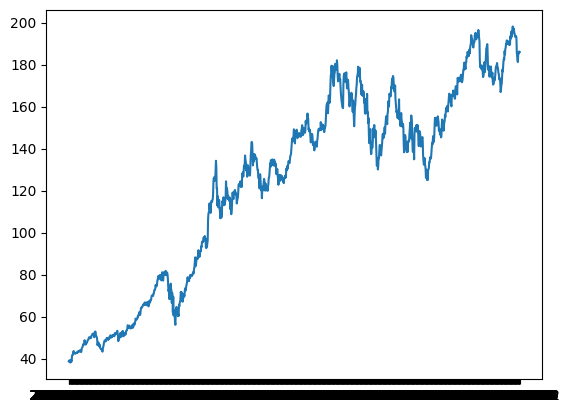

In [5]:
plt.plot(apple_stock_data[:,0], apple_stock_data[:,4])
plt.show()

Uh oh, the x-axis labels looks terrible! It seems that matplotlib is trying to plot one for each day in our data...

One way to fix this is with the code in the following block. I'll just provide it for you to reuse as needed, but if you're interested in understanding what it does at this point here's a breakdown:
- First we write `ax = plt.gca()`: gca means "get current axis," the Axes object in Matplotlib is created with when you start using plt functions like we did above. It gets resolved when you say `plt.show()` or finish the notebook cell. This command allows you to grab it and assign it to a variable `ax`, so you can do things like this:
- One way of getting our desired effect is to access the `xaxis` attribute of the Axis object. It has its own methods and attributes that allow you to customize the appearance and behavior of the x-axis.
- `set_major_locator()` is a method of the Axis object (of which xaxis is an instance) that sets the locator of the major ticks of the axis. The locator determines where the major tick marks and labels should be placed.
- `plt.MaxNLocator(16)`: This is an instance of the MaxNLocator class from Matplotlib, which automatically determines the best location for up to a specified maximum number of ticks along the axis; in this case, up to 16 ticks. It's a way to control the number of ticks to prevent them from becoming too crowded.
- `plt.xticks(rotation=45)` is more self explanatory. I thought this looked nicer.

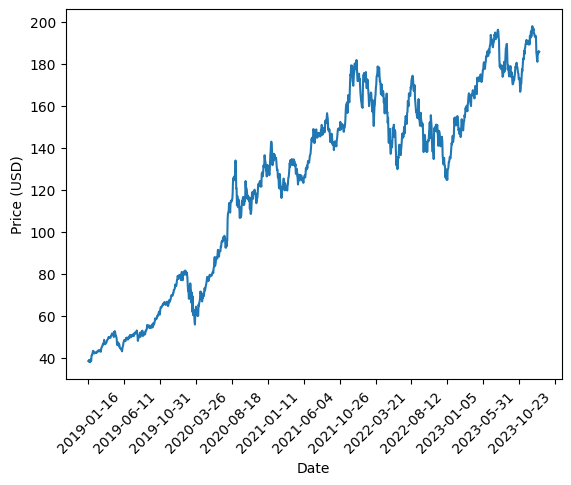

In [6]:
plt.plot(apple_stock_data[:,0], apple_stock_data[:,4])

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xticks(rotation=45)
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.show()

## Unpacking columns to make manipulation easier

Instead of keeping the data all in one array, we may choose to unpack it like this:

In [60]:
dates, open, high, low, close, adj_close, volume = apple_stock_data.T

### Hint:

Transpose the array

### Here's where your part really begins.

Let's isolate only the data since Jan 03 2023 (the 1st and 2nd aren't in our data). You should use u-funcs and array comparison operators. One numpy functio which might come in handy is `np.where()`

Finding the starting index can be done in one short line

In [61]:
starting_index = np.where(dates == '2023-01-03')[0][0]
print(starting_index)

998


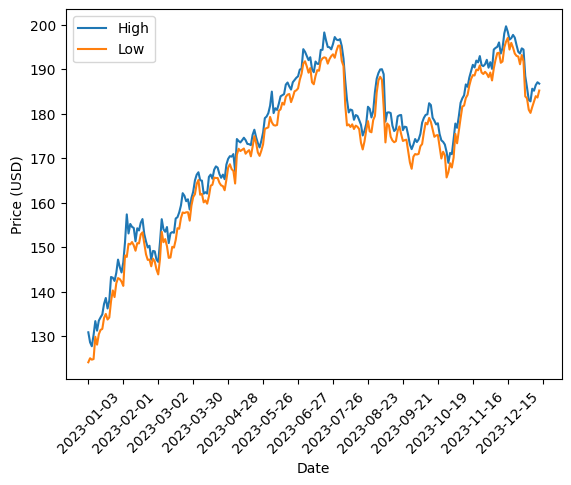

In [62]:
plt.plot(dates[starting_index:], high[starting_index:], label='High')
plt.plot(dates[starting_index:], low[starting_index:], label='Low')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xticks(rotation=45)
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Hopefully we can observe that the 'high' line is always on top and the 'low' line is always on the bottom. This makes sense and gives us confidence we haven't screwed anything up so far :)

## Calculate Daily Percentage Change:
**Task**: Write a function to calculate the daily percentage change in stock prices.

In [63]:
def daily_pct_change(close):
    
    # Calculate the difference between consecutive closing prices
    diff = np.diff(close)
    
    # Calculate the daily percentage change by dividing the difference by the previous closing price
    pct_change = diff / close[:-1]
    
    return pct_change


print(daily_pct_change(close))

apple_stock_data_pd['pct_change'] = apple_stock_data_pd['Close'].pct_change()


[0.005937756397631344 0.0061594251251122015 -0.02244614092864987 ...
 0.005671400052238327 -0.0032225468261178666 0.0017781238596501667]


## Moving Average Calculation:
**Task**: Define a function to calculate the [simple moving average](https://en.wikipedia.org/wiki/Moving_average) of the stock prices over a specified window (e.g., 20 days, 50 days). Then display them overlaid upon the graph of the price (pick only one, ie. the `close`).

Hint: There are several numpy functions which could be used to get this behavior: convolve, cumsum, and roll to name a few.
Using `for` loops is admitting defeat!

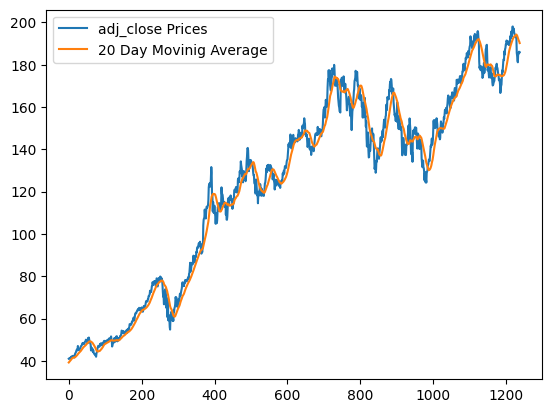

In [64]:
def moving_average(prices, window):
    weights = np.repeat(1.0, window)/window
    ma = np.convolve(prices, weights, 'valid')
    return ma


close = apple_stock_data_pd['Adj Close'].values

window = 20
ma_20 = moving_average(close, window)

plt.plot(close[window-1:], label='adj_close Prices')
plt.plot(ma_20, label='20 Day Movinig Average')
plt.legend()
plt.show()

## Volume Analysis:
**Task**: Analyze trading volume data. Identify days with unusually high trading volumes and see if they correlate with significant price changes.

A good way to see if two things are correlated is to plot one against the other on a scatter plot. Make a scatter plot with each day as a single point, it's volume on the x-axis, and it's percent change (calculated earlier) on the y-axis.

**Extra Task**: Replace "todays' percent change" with the "next day's percent change." If that worked you could make lots of money💰

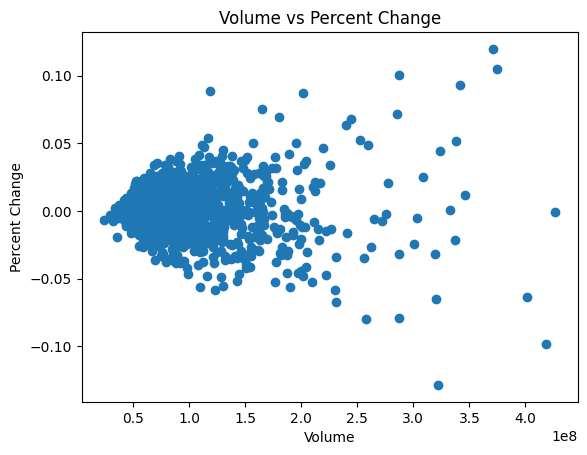

In [65]:

pct_change = daily_pct_change(apple_stock_data_pd['Close'].values)

# Since function returns a numpy array that's shorter by one element,
# need to add a NaN at the beginning to align with the DataFrame index
pct_change = np.insert(pct_change, 0, np.nan)


apple_stock_data_pd['pct_change'] = pct_change


plt.scatter(apple_stock_data_pd['Volume'], apple_stock_data_pd['pct_change'])
plt.xlabel('Volume')
plt.ylabel('Percent Change')
plt.title('Volume vs Percent Change')
plt.show()



## Volatility Calculation:
**Task**: Define a function to calculate the volatility of the stock price, defined as the standard deviation of the price changes over some given window. Since we only have OHLC values, let's consider only the adjusted close prices. Plot the volatility

**Extra Task**: See if there are any correlations between Volatility, Volume, and Percent Change by making a few more scatter plots

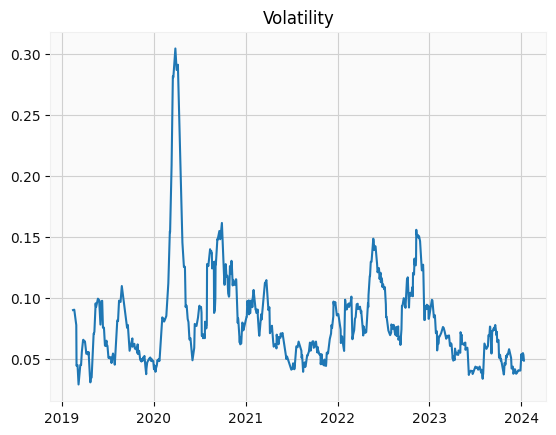

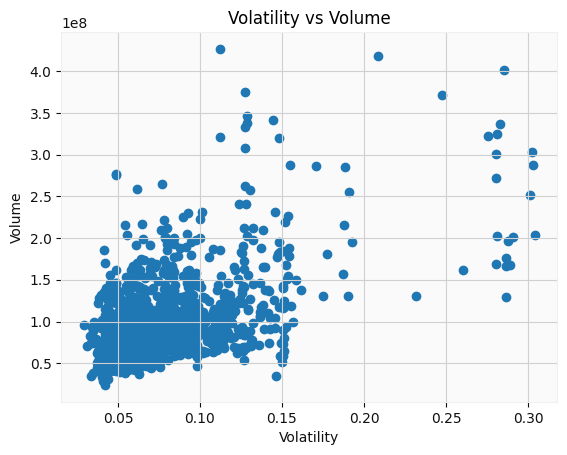

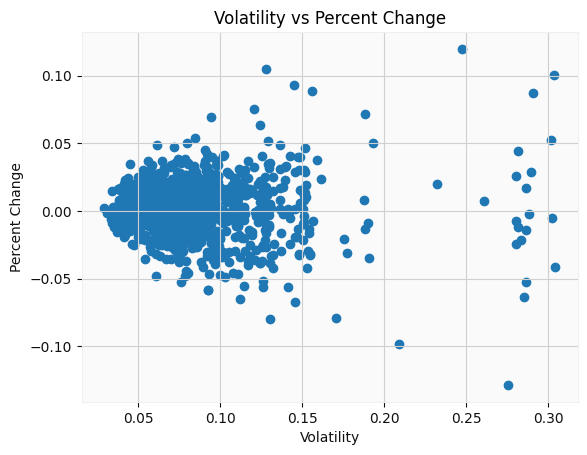

In [74]:
def calculate_volatility(prices, window):
    return prices.pct_change().rolling(window).std()*np.sqrt(window)


apple_stock_data_pd['volatility'] = calculate_volatility(apple_stock_data_pd['Adj Close'], window=20)

plt.plot(apple_stock_data_pd['volatility'])
plt.title('Volatility')
plt.show()

# Extra Task: Scatter plots to see correlations
plt.scatter(apple_stock_data_pd['volatility'], apple_stock_data_pd['Volume'])
plt.xlabel('Volatility')
plt.ylabel('Volume')
plt.title('Volatility vs Volume')
plt.show()

plt.scatter(apple_stock_data_pd['volatility'], apple_stock_data_pd['pct_change'])
plt.xlabel('Volatility')
plt.ylabel('Percent Change')
plt.title('Volatility vs Percent Change')
plt.show()

## Backtest Trading Stratigeies:
Advanced Task: Define a simple strategy and see how it would have performed if you had followed it.

I expect this task to challenge you somewhat. If this isn't your cup of tea I'll pardon you for not completing this section. If it is, have at it!

- A trading strategy could be defined as a function which takes in some inputs which depend on the past data and returns an order to buy, sell, or hold. Or alternatively, it could just return what fraction of its portfolio it wants invested at that time.
$$\text{Strategy}(*\text{inputs}) \rightarrow [0,1]$$
For those who don't know, the general idea is to buy low and sell high! Then you get to pocket the difference.
- You'll also need to decide what inputs your stratgy should take. A simple stratgy to implement would be buying when the 20-day simple moving average (which you calulated earlier) goes above the 50-day simple moving average, and selling when it goes below. The function might look something like
$$\text{SMA_Cross_Strategy}(\text{MA}_{20}, \text{MA}_{50}) = \begin{cases}100\% & \text{if}\ \ \text{MA}_{20} > \text{MA}_{50}\\
0\% & \text{else} \end{cases}$$
- You'll need to implement the logic needed to keep track of portfolio value over time. Here you're allowed to use a for loop!
- Plot your portfolio balence as a function of time

In [67]:
def SMA_Cross_Strategy(MA_20, MA_50):
    if MA_20 > MA_50:
        return 1.0  # 100% of portfolio invested
    else:
        return 0.0  # 0% of portfolio invested

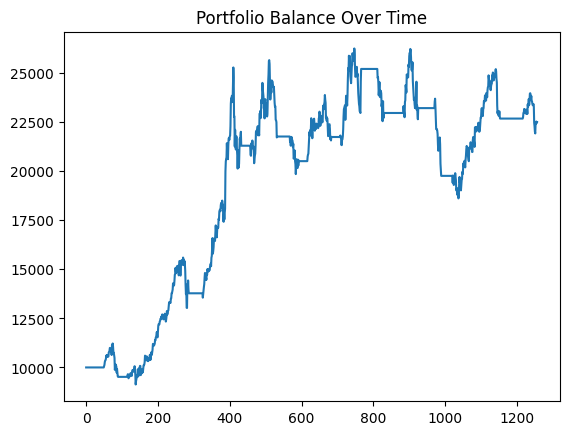

In [68]:

apple_stock_data_pd['MA_20'] = apple_stock_data_pd['Adj Close'].rolling(window=20).mean()
apple_stock_data_pd['MA_50'] = apple_stock_data_pd['Adj Close'].rolling(window=50).mean()

#set up portfolio
cash = 10000
stock = 0
portfolio = []


for i in range(len(apple_stock_data_pd)):
    #buy
    if apple_stock_data_pd['MA_20'].iloc[i] > apple_stock_data_pd['MA_50'].iloc[i]:
        stock += cash / apple_stock_data_pd['Adj Close'].iloc[i]
        cash = 0
    #sell
    elif apple_stock_data_pd['MA_20'].iloc[i] < apple_stock_data_pd['MA_50'].iloc[i]:
        cash += stock * apple_stock_data_pd['Adj Close'].iloc[i]
        stock = 0
    #portfolio value
    portfolio_value = cash + stock * apple_stock_data_pd['Adj Close'].iloc[i]
    portfolio.append(portfolio_value)

#plot portfolio balance
plt.plot(apple_stock_data_pd.index, portfolio)
plt.title('Portfolio Balance Over Time')
plt.show()

## Cheating with `mplfinance`

To be clear, I still want you do follow the instructions above! But let me show you a more sophisticated way of getting similar results:

In [69]:
!pip install mplfinance







[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\logan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [70]:
# Convert the date column to datetime and set it as index
apple_stock_data_pd['Date'] = pd.to_datetime(apple_stock_data_pd['Date'])
apple_stock_data_pd.set_index('Date', inplace=True)

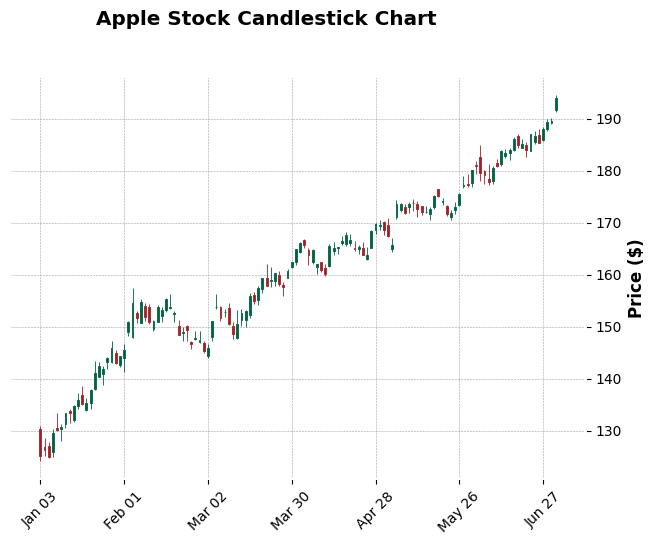

In [71]:
import mplfinance as mpf

start_date = '2023-01-01'
end_date = '2023-06-30'

# Create the candlestick chart
mpf.plot(apple_stock_data_pd.loc[start_date:end_date],
         type='candle', style='charles',
         title='Apple Stock Candlestick Chart',
         ylabel='Price ($)')


A harsh lesson to learn over and over is that most of the time when you work hard to make something from scratch there is package which makes it utterly trivial... I've experienced this many times.

Here, we see that it isn't

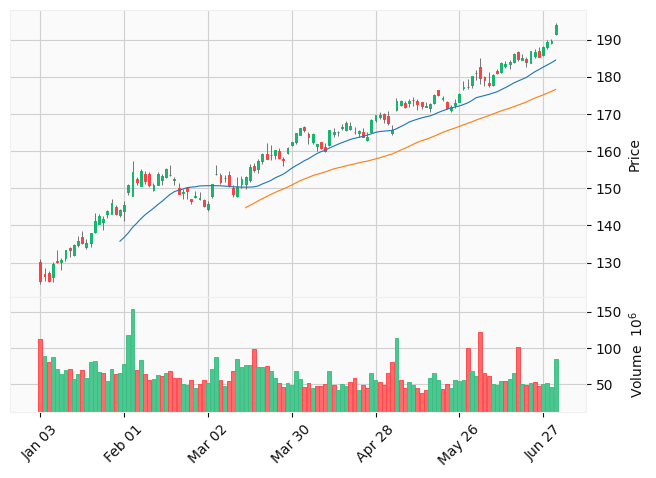

In [72]:
# Example with volume and moving averages
mpf.plot(apple_stock_data_pd.loc[start_date:end_date],
         type='candle', mav=(20, 50), volume=True, style='yahoo')

C:\Users\logan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


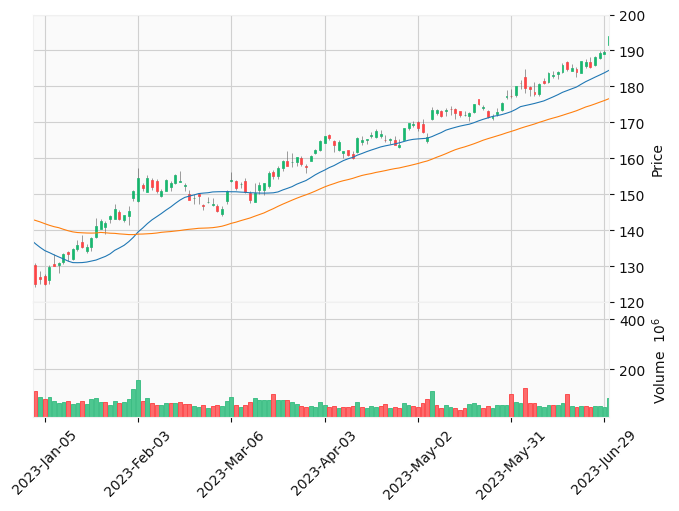

In [73]:
# Example with volume and moving averages
mpf.plot(apple_stock_data_pd,
         type='candle', mav=(20, 50), volume=True, style='yahoo',
         xlim=(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-06-30')),
         ylim=(120,200))